In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import mglearn
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

유방암 데이터 

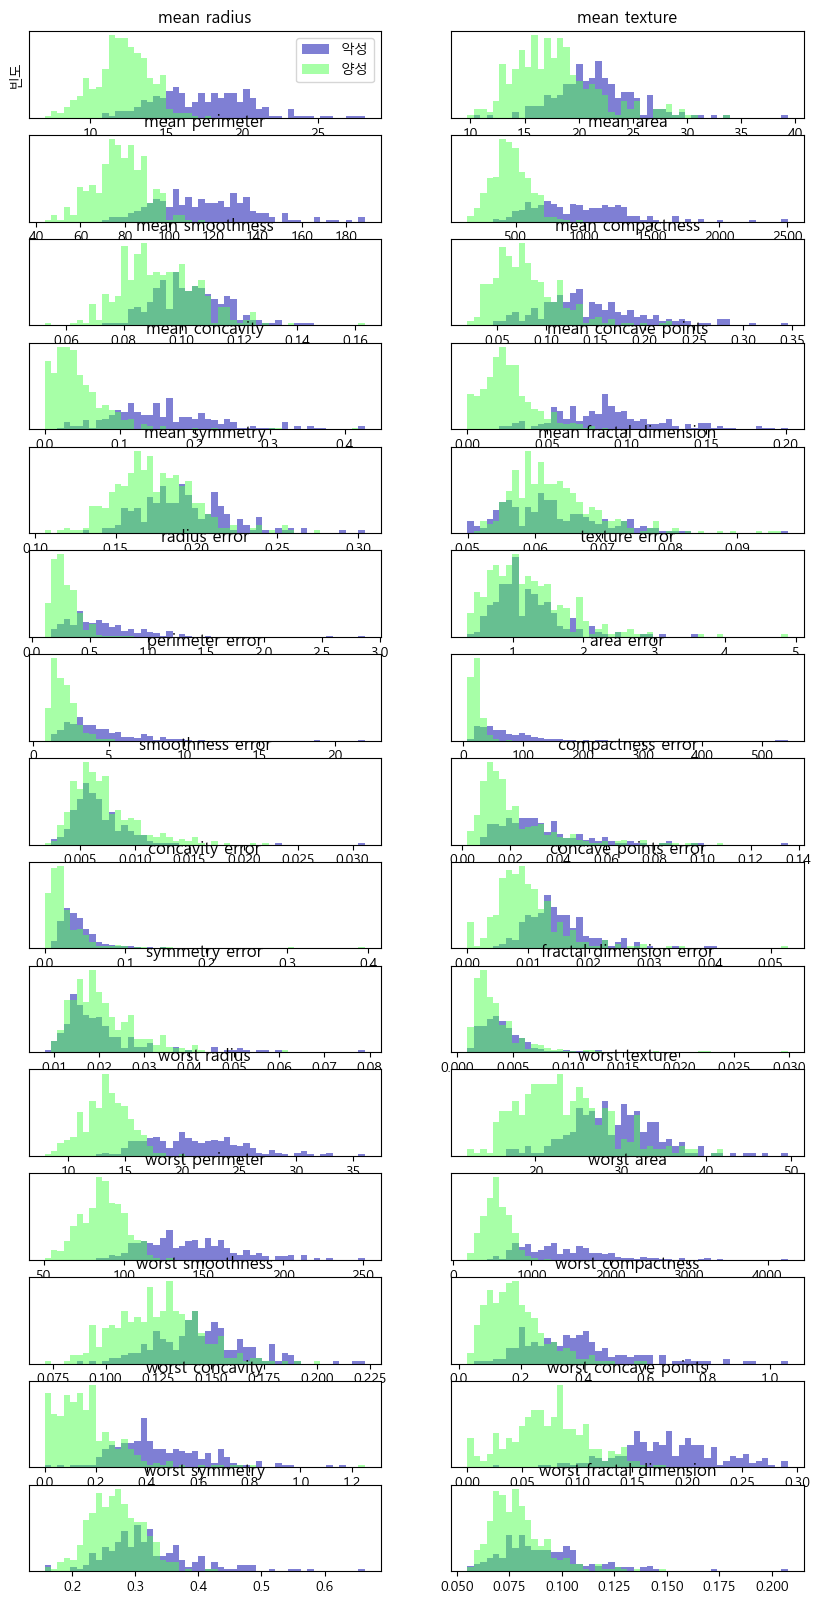

In [2]:
cancer = load_breast_cancer()

# fig, axes = plt.subplot(5, 12, figsize = (10, 20))
fig, axes = plt.subplots(15, 2, figsize = (10,20))

malignant = cancer.data[cancer.target==0] # 악성
benign = cancer.data[cancer.target==1] # 양성

ax = axes.ravel()

for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins = 50)
    ax[i].hist(malignant[:,i], bins = bins, color = mglearn.cm3(0), alpha = 0.5)
    ax[i].hist(benign[:,i], bins = bins, color = mglearn.cm3(2), alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성', '양성'], loc = 'best')



In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
x_scaled = scaler.transform(cancer.data)

In [4]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)   # 몇 개의 주성분을 남길건지
x_pca = pca.fit_transform(x_scaled)

In [5]:
x_pca.shape, x_scaled.shape

((569, 2), (569, 30))

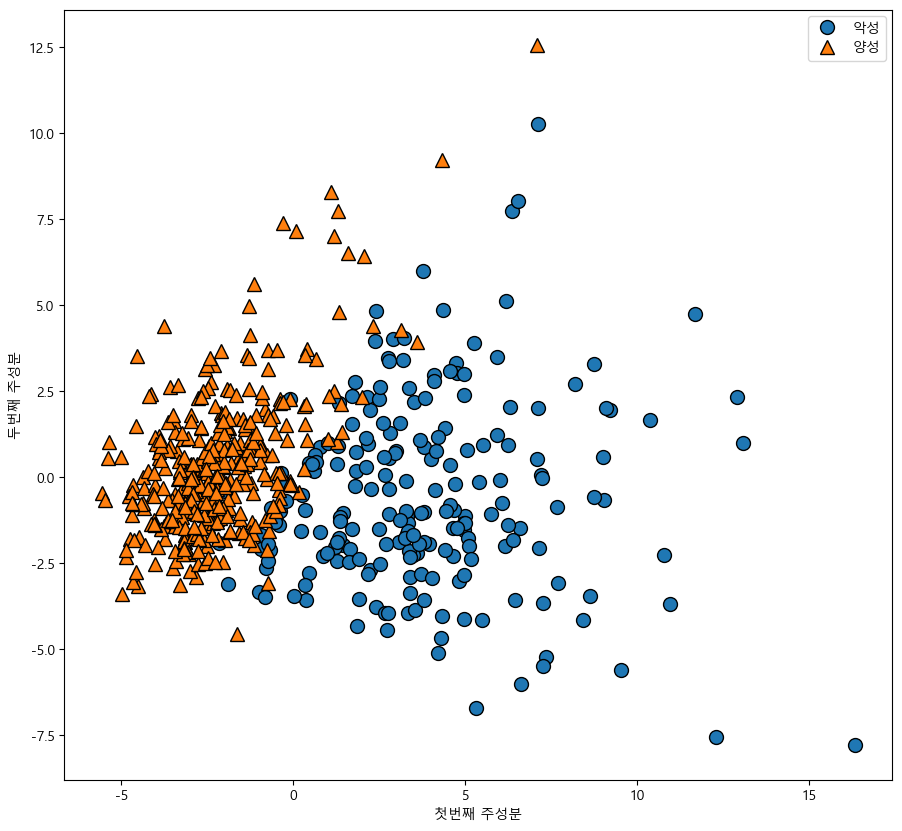

In [6]:
# 클래스의 색깔로 구분해서 두 개의 주성분 그래프 그려보기
plt.figure(figsize=(15,10))

mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], cancer.target)
plt.legend(['악성','양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()

In [7]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA 
from sklearn.datasets import fetch_lfw_people 
from sklearn.model_selection import train_test_split 
import mglearn
import matplotlib.pyplot as plt 

# plt.rcParams['font family']='Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False


In [8]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) 
image_shape = people.images[0].shape


people.image.shape :  (3023, 87, 65)
클래스의 개수 :  62


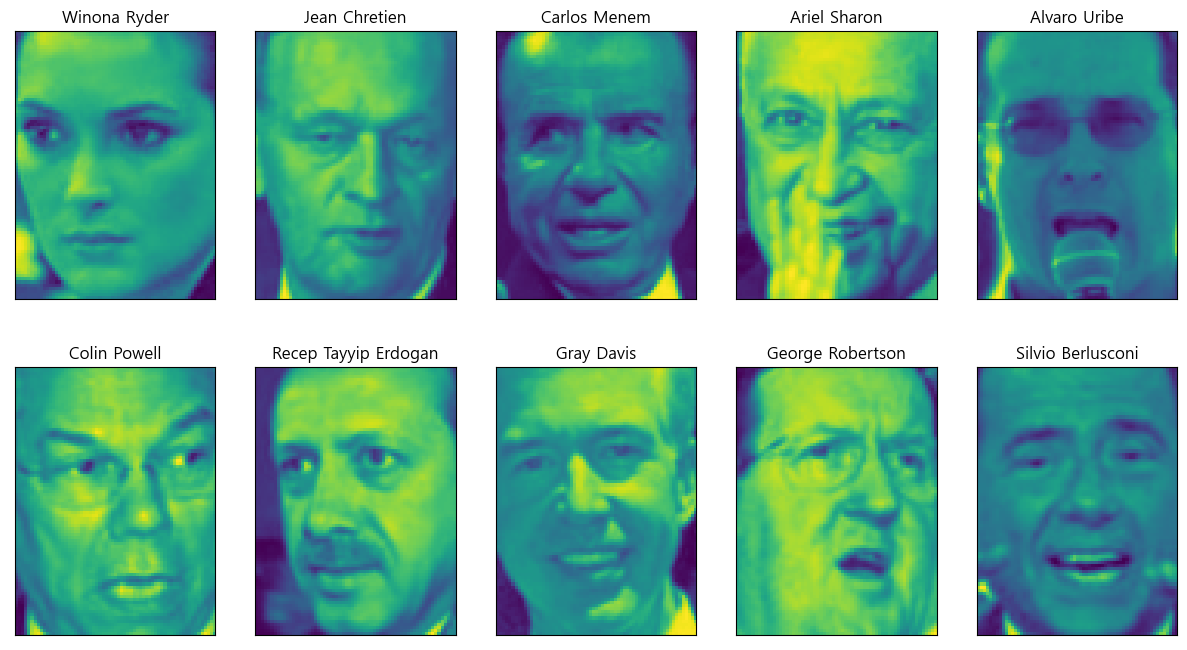

In [9]:
fig, axes = plt.subplots(2, 5, figsize = (15,8),
                         subplot_kw = {'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image) # imshow로 그림 출력
    ax.set_title(people.target_names[target]) # 각 subplot의 타이틀

# plt.gray() # 그림 흑백
# plt.show() # 그래프 출력

print('people.image.shape : ', people.images.shape)
print('클래스의 개수 : ', len(people.target_names))

In [10]:
### 데이터셋의 편중을 막기 위해 50개의 이미지만 선택
mask = np.zeros(people.target.shape, dtype=np.bool) # 3023개의 boolean타입 False 생성
people_unique = np.unique(people.target) # 중복된 값 제외

for target in people_unique: # 중복을 제거한 target리스트에서 한개의 원소 선택
# people.target(3023개의 리스트)중 선택된 원소와 같은 것만 출력 ==> [0] 리스트의 원소로 접근 ==> False의 갯수 50개까지 출력
# 이 논리 값을 mask의 인덱스로 사용 후 True로 변환
    mask[np.where(people.target == target)[0][:50]] = 1 

x_people = people.data[mask] # 훈련 데이터 생성
y_people = people.target[mask] # 테스트 데이터 생성

In [11]:
# 전처리 메소드 import

from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_people_scaled = scaler.fit_transform(x_people) # 전처리 메소드 적용
# 하지만 스케일을 0과 1사이의 값으로 조정
x_people = x_people/255

# 머신 러닝 library import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 전처리한 데이터를 분할
x_train, x_test, y_train, y_test = train_test_split(x_people, y_people,
                                                    stratify=y_people, random_state=0) 
                                                    # 그룹화할 데이터, 랜덤상태

# 머신 러닝 라이브러리 import
knn = KNeighborsClassifier(n_neighbors=3) # 이웃의 수
knn.fit(x_train, y_train) # 모델 학습
print('knn.score(x_test, y_test) \n최근접이웃의 일반화 세트 점수: {:.3f}'.format(
    knn.score(x_test, y_test))) # 0.223

# 알 수 있는 점
# 정확도가 22.3%, 무작위로 분류하는 정확도는 1/62 = 1.6%
# 얼굴의 유사도를 측정하기 위해 원본 픽셀 공간에서 거리를 계산하는 것은 비효율적
# 각 픽셀의 회색톤 값을 다른 이미지에서 동일한 위치에 있는 픽셀 값과 비교. 
# 이런 방식은 사람이 얼굴 이미지를 인식하는 것과는 많이 다르고, 
# 픽셀을 있는 그대로 비교하는 방식으로는 얼굴의 특징을 잡아내기 어려움

knn.score(x_test, y_test) 
최근접이웃의 일반화 세트 점수: 0.219


=============== PCA 적용 ===============
x_train_pca.shape 
train형태:(1547, 40)
x_test_pca.shape 
test형태:(516, 40)

=============== PCA 적용한 거 KNN 돌린 정확도 ===============
테스트 세트 정확도: 
0.316

pca.components_.shape 
(40, 5655)


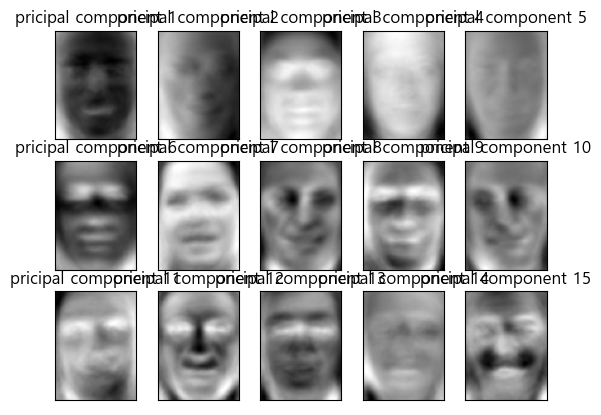

In [20]:
# library import
from sklearn.decomposition import PCA

# PCA 모델 생성 및 적용
pca = PCA(n_components=40, whiten=True, random_state=0) # 주성분 갯수, whitening option, 랜덤상태
pca.fit(x_train) # PCA 학습
x_train_pca = pca.transform(x_train) # PCA를 데이터에 적용
x_test_pca = pca.transform(x_test)

# PCA를 적용한 데이터 형태
print("=============== PCA 적용 ===============")
print('x_train_pca.shape \ntrain형태:{}'.format(x_train_pca.shape)) # (1547, 100)
print('x_test_pca.shape \ntest형태:{}'.format(x_test_pca.shape)) # (516, 100)
print("")

# 머신 러닝 모델 생성 및 학습
print("=============== PCA 적용한 거 KNN 돌린 정확도 ===============")
knn = KNeighborsClassifier(n_neighbors=1) # 이웃의 수
knn.fit(x_train_pca, y_train) # 모델 학습
print('테스트 세트 정확도: \n{:.3f}'.format(knn.score(x_test_pca, y_test))) # 0.314
print("")

# 모델의 정확도가 23%에서 31%로 상승
# 이미지 데이터일 경우엔 계산한 주성분을 쉽게 시각화 가능
# 주성분이 나타내는 것은 입력 데이터 공간에서의 어떤 방향임을 기억
# 입력 차원이 87 x 65픽셀의 흑백 이미지이고 따라서 주성분또한 87 x 65

print('pca.components_.shape \n{}'.format(pca.components_.shape)) # (40, 5655)
fig, axes = plt.subplots(3, 5, # subplot 3x5를 axes에 할당
                         subplot_kw={'xticks': (), 'yticks': ()}) # subplot 축 설정


for i, (comp, ax) in enumerate(zip(pca.components_, axes.ravel())): # pca.components_와 axes.ravel()을 하나씩 순서대로 할당한 후 인덱스 부여
    ax.imshow(comp.reshape(image_shape)) # image_shape= (87, 65)
    ax.set_title('pricipal component {}'.format(i+1)) # image title

plt.gray() # 사진 흑백
plt.show() # 사진 출력